In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import calendar
import datetime
import statistics

In [15]:
all_df = pd.read_pickle('all-results.pkl')
sorted_all_df = all_df.sort_values('created_utc', ascending=True)

In [86]:
def calculate_to_plot(df):
    to_plot = []
    vals = []
    time = calendar.timegm(datetime.datetime(2018, 12, 2).utctimetuple())
    step = 500
    for index, x in df.iterrows():
        if x.created_utc < time:
            vals += x.score*[x.sentiment]
        else:
            to_plot += [(time, statistics.mean(vals),datetime.date.fromtimestamp(time).strftime("%m/%d"))]
            time += 24*60*60
            vals = [x.sentiment]
    to_plot += [(time, statistics.mean(vals),datetime.date.fromtimestamp(time).strftime("%m/%d"))]
    return to_plot

In [87]:
all_plot = calculate_to_plot(sorted_all_df)

In [88]:
import matplotlib.pyplot as plt
import csv
sp_df = pd.read_csv('snp500.csv')
sp_df['Date'].apply(lambda x : int(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()))

0      1543813200
1      1543899600
2      1544072400
3      1544158800
4      1544418000
          ...    
245    1574398800
246    1574658000
247    1574744400
248    1574830800
249    1575003600
Name: Date, Length: 250, dtype: int64

In [123]:
from scipy.interpolate import UnivariateSpline
s = UnivariateSpline([x[0] for x in all_plot], [x[1] for x in all_plot], s=1)
xs = [x[0] for x in all_plot]
ys = s(xs)
xs = [x[2] for x in all_plot]
df_new = pd.DataFrame(list(zip(xs,ys)), columns = ['Date','Sentiment'])

In [116]:
investing_df = all_df[all_df.subreddit == 'investing']
sorted_investing_df = investing_df.sort_values('created_utc', ascending=True)
investing_plot = calculate_to_plot(sorted_investing_df)                      

In [122]:
from scipy.interpolate import UnivariateSpline
s = UnivariateSpline([x[0] for x in investing_plot], [x[1] for x in investing_plot], s=1)
xs_investing = [x[0] for x in investing_plot]
ys_investing = s(xs_investing)
xs_investing = [x[2] for x in investing_plot]
df_new_investing = pd.DataFrame(list(zip(xs_investing,ys_investing)), columns = ['Date','Sentiment'])

Text(0, 0.5, 'close')

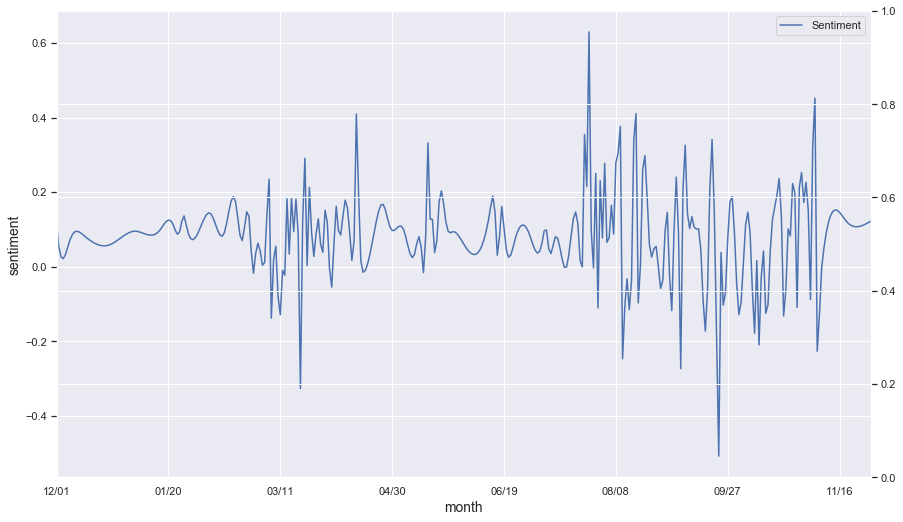

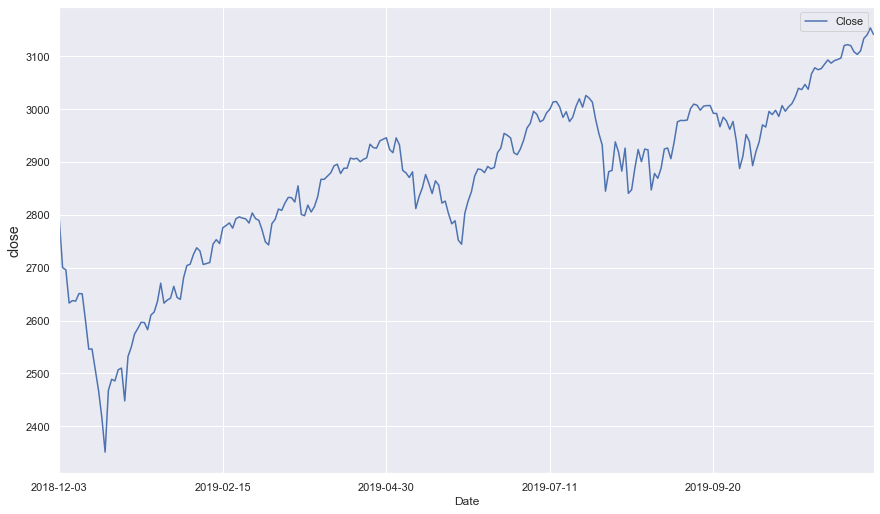

In [138]:
ax = df_new.plot(x='Date',y='Sentiment')
ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("sentiment",fontsize=14)
ax.set_prop_cycle(None)

ax2 = ax.twinx()
ax2 = sp_df.plot(x='Date',y='Close') 
ax2.set_ylabel("close",fontsize=14)


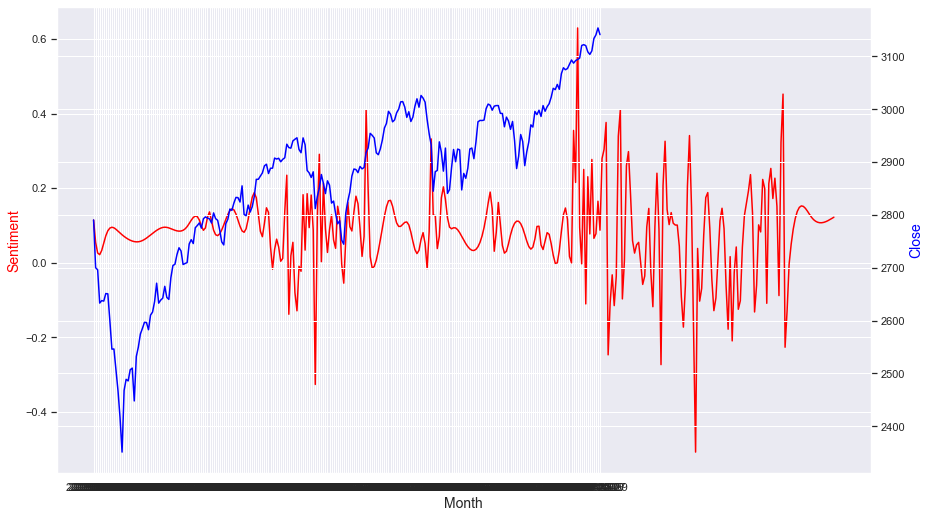

In [141]:
fig,ax = plt.subplots()
ax.plot(df_new.Date,df_new.Sentiment,color="red")
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("Sentiment",color="red",fontsize=14)
ax.set_prop_cycle(None)

ax2 = ax.twinx()
ax2.plot(sp_df.Date,sp_df.Close,color="blue")
ax2.set_ylabel("Close", color = "blue",fontsize=14)
plt.show()



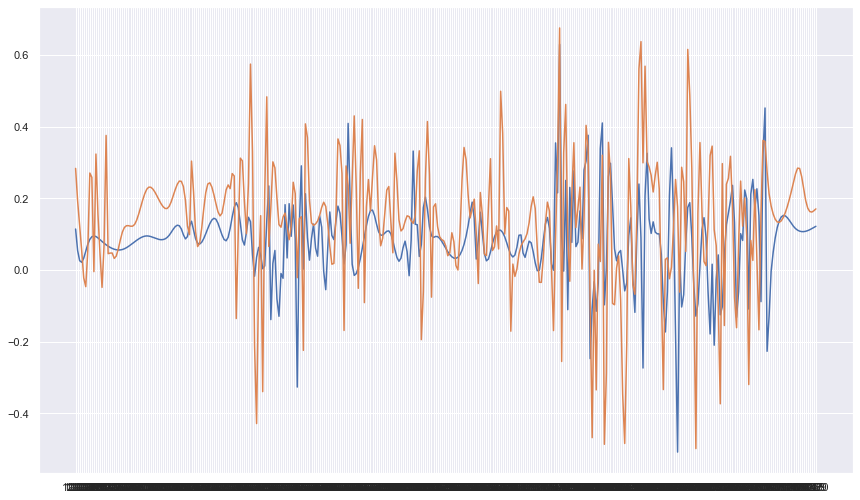

In [124]:
fig = plt.figure()

for frame in [df_new, df_new_investing]:
    plt.plot(frame['Date'], frame['Sentiment'])

<bound method NDFrame.head of            Date         Open         High          Low        Close  \
0    2018-12-03  2790.500000  2800.179932  2773.379883  2790.370117   
1    2018-12-04  2782.429932  2785.929932  2697.179932  2700.060059   
2    2018-12-06  2663.510010  2696.149902  2621.530029  2695.949951   
3    2018-12-07  2691.260010  2708.540039  2623.139893  2633.080078   
4    2018-12-10  2630.860107  2647.510010  2583.229980  2637.719971   
..          ...          ...          ...          ...          ...   
245  2019-11-22  3111.409912  3112.870117  3099.260010  3110.290039   
246  2019-11-25  3117.439941  3133.830078  3117.439941  3133.639893   
247  2019-11-26  3134.850098  3142.689941  3131.000000  3140.520020   
248  2019-11-27  3145.489990  3154.260010  3143.409912  3153.629883   
249  2019-11-29  3147.179932  3150.300049  3139.340088  3140.979980   

       Adj Close      Volume  
0    2790.370117  4186060000  
1    2700.060059  4499840000  
2    2695.949951  514147